In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('weight-height.csv')

In [71]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
label = LabelEncoder()

In [74]:
df.Gender = label.fit_transform(df['Gender'])

In [75]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [76]:
x = df.drop('Weight',axis = 1)
y = df['Weight']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70)

# KNN Regression

In [79]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
reg = KNeighborsRegressor(n_neighbors= 119)

In [87]:
reg.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=119)

In [88]:
reg.score(xtest,ytest)

0.893958454630306

In [89]:
pred = reg.predict(xtest)

In [90]:
pred

array([210.20538539, 185.44380385, 173.17528298, ..., 140.29475122,
       157.06636716, 202.13710996])

# K value calculate

In [85]:
error_rate = []
for i in range(15,200,10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    y_predict = knn.predict(xtest)
    error_rate.append(np.mean(y_predict-ytest))

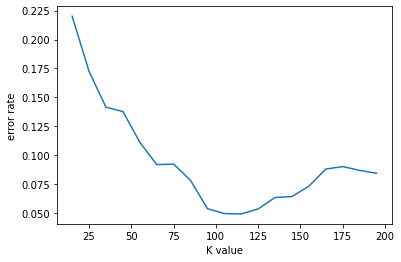

In [18]:
plt.xlabel('K value')
plt.ylabel('error rate')
plt.plot(range(15,200,10),error_rate)

# Linear Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lreg = LinearRegression()

In [21]:
lreg.fit(xtrain,ytrain)

LinearRegression()

In [22]:
lreg.score(xtest,ytest)

0.900850230003216

In [23]:
pred_value = lreg.predict(xtest)
pred_value

array([129.86714269, 221.01224695, 108.37741459, ..., 175.30811279,
       169.17641631, 100.04531418])

# Mean Squared Error

In [39]:
from sklearn.metrics import mean_squared_error

In [42]:
mse = mean_squared_error(ytest,pred)

In [43]:
mse

106.93527172350694

In [44]:
import math
rmse = math.sqrt(mse)
rmse

10.340951200131782

# KNN Classifier

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('weight-height.csv')

In [57]:
from sklearn.preprocessing import LabelEncoder
label2 = LabelEncoder()
data.Gender = label.fit_transform(data['Gender'])

In [58]:
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [59]:
X = data.drop('Gender',axis = 1)
Y = data['Gender']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=.70)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
clf = KNeighborsClassifier(n_neighbors=175)

In [64]:
clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=175)

In [65]:
clf.score(X_test,Y_test)

0.9096221269964939

In [66]:
error = []
for i in range(15,200,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_predict = knn.predict(X_test)
    error.append(np.mean(Y_predict != Y_test))

In [67]:
error

[0.08297623685235683,
 0.08648227502921699,
 0.08609271523178808,
 0.08609271523178808,
 0.08648227502921699,
 0.0876509544215037,
 0.0872613946240748,
 0.08804051421893261,
 0.08920919361121932,
 0.08959875340864823,
 0.08959875340864823,
 0.0884300740163615,
 0.08998831320607713,
 0.09115699259836385,
 0.09037787300350604,
 0.09193611219322166,
 0.09037787300350604,
 0.09037787300350604,
 0.09076743280093494]

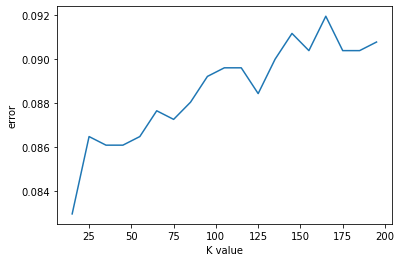

In [68]:
plt.xlabel('K value')
plt.ylabel('error')
plt.plot(range(15,200,10),error)